___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [2]:
df = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

Text(0.5, 0, 'FICO')

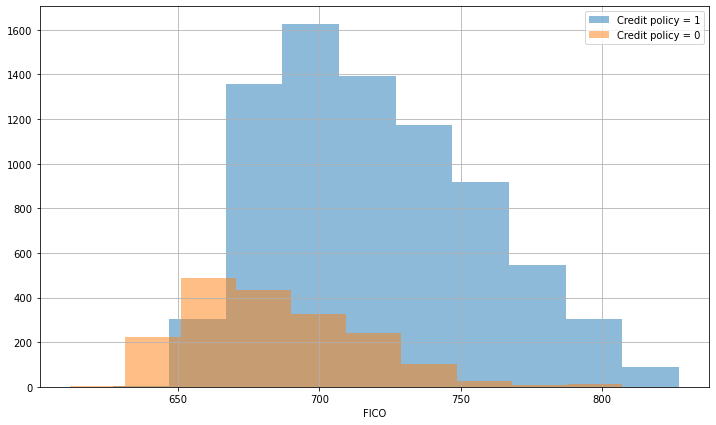

In [5]:
plt.figure(figsize=(12,7))
df[df['credit.policy'] == 1]['fico'].hist(alpha=0.5,label='Credit policy = 1')
df[df['credit.policy'] == 0]['fico'].hist(alpha=0.5, label='Credit policy = 0')
plt.legend()
plt.xlabel('FICO')

** Create a similar figure, except this time select by the not.fully.paid column.**

Text(0.5, 0, 'FICO')

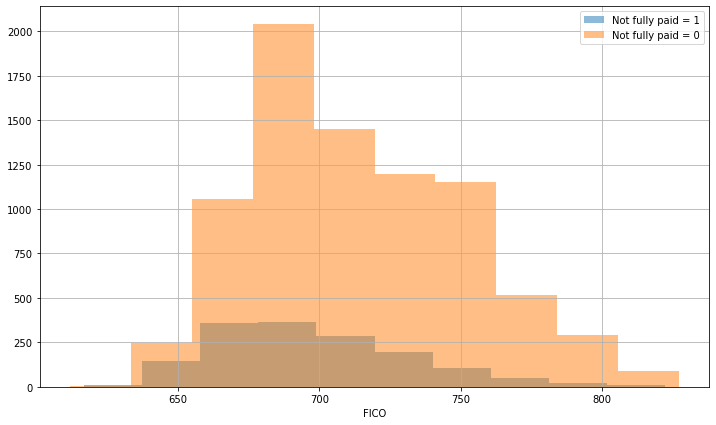

In [6]:
plt.figure(figsize=(12,7))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,label='Not fully paid = 1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,label='Not fully paid = 0')
plt.legend()
plt.xlabel('FICO')

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

<AxesSubplot:xlabel='purpose', ylabel='count'>

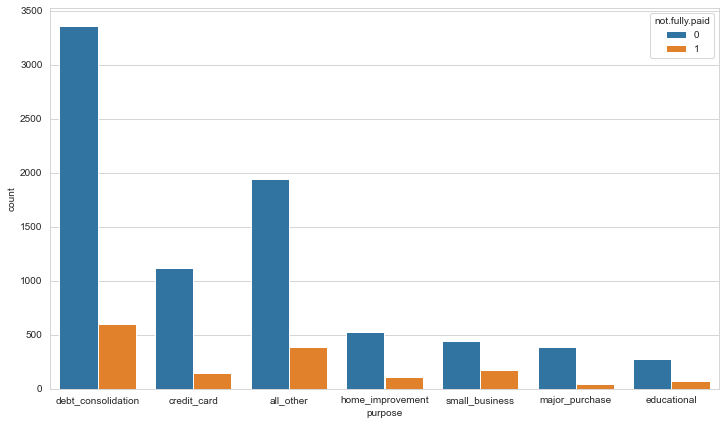

In [7]:
plt.figure(figsize=(12,7))
sns.set_style('whitegrid')
sns.countplot(x='purpose',data=df,hue='not.fully.paid')

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

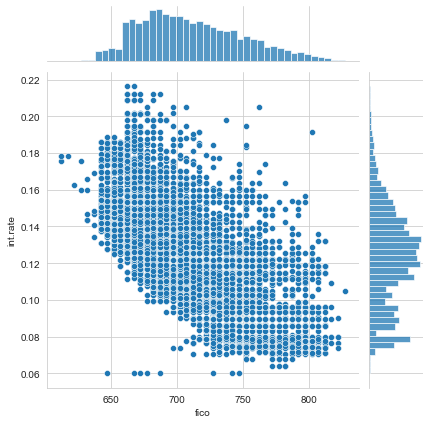

In [8]:
sns.jointplot(x='fico',y='int.rate', data=df)

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

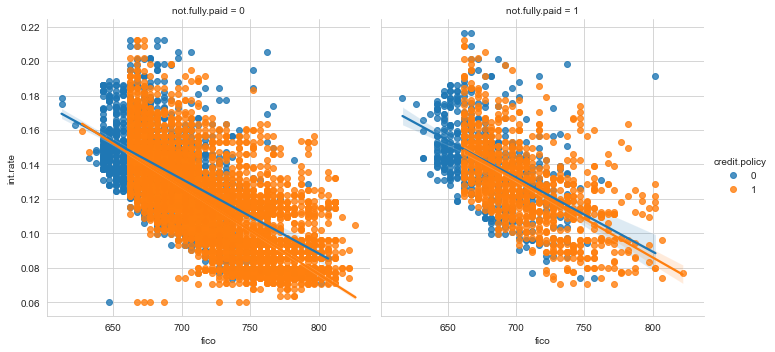

In [9]:
sns.lmplot(x='fico',data=df, y='int.rate',col='not.fully.paid', hue='credit.policy')

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [10]:
# sns.pairplot(df,hue='not.fully.paid')

## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a list of 1 element containing the string 'purpose'. Call this list cat_feats.**

In [11]:
cat_feats = list(df['purpose'].unique())
cat_feats

['debt_consolidation',
 'credit_card',
 'all_other',
 'home_improvement',
 'small_business',
 'major_purchase',
 'educational']

**Now use pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [12]:
dfDummies =pd.get_dummies(df,columns=['purpose'],drop_first=True)
dfDummies.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [13]:
dfDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [14]:
X = dfDummies.drop('not.fully.paid',axis=1)
y = dfDummies['not.fully.paid']

In [15]:
dfDummies.groupby(['not.fully.paid'])['not.fully.paid'].count()

not.fully.paid
0    8045
1    1533
Name: not.fully.paid, dtype: int64

## <<<<<<< Treating Class imbalance  >>>>>>>>>>>

In [16]:
#Random undersampling - manual

#Balancing ration Ratio of 1 (size = 2000) did not work as it reduced accuracy highly
#Chaning the ration to 2

#df_0 = dfDummies[dfDummies['not.fully.paid']==0]
#df_0_sample = df_0.sample(3000)
#df_1 = dfDummies[dfDummies['not.fully.paid']==1]

##df_Final = df_0.append(df_1)
#df_Final = pd.concat([df_0_sample, df_1],axis=0)

#y = df_Final['not.fully.paid']
#X = df_Final.drop('not.fully.paid',axis=1)

# Imbalance liabrary

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=600,random_state=101)

In [18]:
##import imblearn - Radom under sampling
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.under_sampling import CondensedNearestNeighbour

from imblearn.under_sampling import InstanceHardnessThreshold

#rus = RandomUnderSampler(sampling_strategy='auto', random_state=0, replacement=False)
iht = InstanceHardnessThreshold(estimator = rf,
                                sampling_strategy='auto',
                               random_state=101, 
                                cv=3,
                                n_jobs=2)

X = dfDummies.drop('not.fully.paid',axis=1)
y = dfDummies['not.fully.paid']
X, y = iht.fit_resample(X, y)

df_Final = X.join(y)

In [19]:
X.shape, y.shape

((3107, 18), (3107,))

In [20]:
df_Final.groupby(['not.fully.paid'])['not.fully.paid'].count()

not.fully.paid
0    1574
1    1533
Name: not.fully.paid, dtype: int64

In [21]:
df_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               3107 non-null   int64  
 1   int.rate                    3107 non-null   float64
 2   installment                 3107 non-null   float64
 3   log.annual.inc              3107 non-null   float64
 4   dti                         3107 non-null   float64
 5   fico                        3107 non-null   int64  
 6   days.with.cr.line           3107 non-null   float64
 7   revol.bal                   3107 non-null   int64  
 8   revol.util                  3107 non-null   float64
 9   inq.last.6mths              3107 non-null   int64  
 10  delinq.2yrs                 3107 non-null   int64  
 11  pub.rec                     3107 non-null   int64  
 12  purpose_credit_card         3107 non-null   uint8  
 13  purpose_debt_consolidation  3107 

In [22]:
# sns.pairplot(df_Final, hue='not.fully.paid')

# # *************Final X and y obtained************

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               3107 non-null   int64  
 1   int.rate                    3107 non-null   float64
 2   installment                 3107 non-null   float64
 3   log.annual.inc              3107 non-null   float64
 4   dti                         3107 non-null   float64
 5   fico                        3107 non-null   int64  
 6   days.with.cr.line           3107 non-null   float64
 7   revol.bal                   3107 non-null   int64  
 8   revol.util                  3107 non-null   float64
 9   inq.last.6mths              3107 non-null   int64  
 10  delinq.2yrs                 3107 non-null   int64  
 11  pub.rec                     3107 non-null   int64  
 12  purpose_credit_card         3107 non-null   uint8  
 13  purpose_debt_consolidation  3107 

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 121 to 863
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               2174 non-null   int64  
 1   int.rate                    2174 non-null   float64
 2   installment                 2174 non-null   float64
 3   log.annual.inc              2174 non-null   float64
 4   dti                         2174 non-null   float64
 5   fico                        2174 non-null   int64  
 6   days.with.cr.line           2174 non-null   float64
 7   revol.bal                   2174 non-null   int64  
 8   revol.util                  2174 non-null   float64
 9   inq.last.6mths              2174 non-null   int64  
 10  delinq.2yrs                 2174 non-null   int64  
 11  pub.rec                     2174 non-null   int64  
 12  purpose_credit_card         2174 non-null   uint8  
 13  purpose_debt_consolidation  2174

In [27]:
X_train.shape

(2174, 18)

In [28]:
y_check = pd.DataFrame(y_train,columns=['not.fully.paid'])
y_check.value_counts()

not.fully.paid
1                 1096
0                 1078
dtype: int64

In [29]:
y_test.value_counts()

0    496
1    437
Name: not.fully.paid, dtype: int64

In [30]:
import time
import sklearn.metrics

## Create Log file

In [31]:
import datetime
import os

x = datetime.datetime.now()
sdate = x.strftime("%d_%m_%Y")
i = 1
fname = "InstaceHardnessThreshold_" + sdate + "_" + str(i) + ".csv"
while os.path.exists(fname):
    i+=1
    fname =  "InstaceHardnessThreshold_" + sdate + "_" + str(i) + ".csv"

fname

'InstaceHardnessThreshold_04_03_2023_1.csv'

In [32]:
file_1 = open(fname,"a")
file_1.write("Model, Accuracy, f1_Score_0,f1_Score_1,Time taken" + "\n")

50

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [33]:
from sklearn.tree import DecisionTreeClassifier

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [34]:
DTClassifier = DecisionTreeClassifier()

In [35]:
startTime = time.time()

In [36]:
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
reqTime = time.time() - startTime
reqTime

0.0613703727722168

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [38]:
pred = DTClassifier.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

In [40]:
print (classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       496
           1       0.83      0.84      0.83       437

    accuracy                           0.84       933
   macro avg       0.84      0.84      0.84       933
weighted avg       0.84      0.84      0.84       933



In [41]:
print(confusion_matrix(y_test,pred))

[[421  75]
 [ 71 366]]


In [42]:
#Log results to file

In [43]:
arrf1 = f1_score(y_test, pred, average=None)
f1_0 = str(round(arrf1[0],2))
f1_1 = str(round(arrf1[1],2))
s_acc = str(round(accuracy_score(y_test, pred),2))

In [44]:
file_1.write("Decision_Tree_Model," + s_acc + "," + f1_0 + "," + f1_1 + "," + str(round(reqTime,2)) + "\n")

40

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf = RandomForestClassifier(n_estimators=600)

In [47]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 600,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [48]:
startTime = time.time()

In [49]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600)

In [50]:
reqTime = time.time() - startTime
reqTime

2.1659936904907227

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [51]:
preds = rf.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [52]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       496
           1       0.92      0.89      0.90       437

    accuracy                           0.91       933
   macro avg       0.91      0.91      0.91       933
weighted avg       0.91      0.91      0.91       933



**Show the Confusion Matrix for the predictions.**

In [53]:
print(confusion_matrix(y_test,preds))

[[462  34]
 [ 49 388]]


In [54]:
arrf1 = f1_score(y_test, preds, average=None)
f1_0 = str(round(arrf1[0],2))
f1_1 = str(round(arrf1[1],2))
s_acc = str(round(accuracy_score(y_test, preds),2))

file_1.write("Random_Forest," + s_acc + "," + f1_0 + "," + f1_1 + "," + str(round(reqTime,2)) + "\n")

33

**What performed better the random forest or the decision tree?**

# Great Job!

# Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
LogReg = LogisticRegression(max_iter=500)

In [57]:
startTime = time.time()

In [58]:
LogReg.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [59]:
reqTime = time.time() - startTime
reqTime

0.15832257270812988

In [60]:
preds = LogReg.predict(X_test)

In [61]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       496
           1       0.82      0.77      0.79       437

    accuracy                           0.81       933
   macro avg       0.81      0.81      0.81       933
weighted avg       0.81      0.81      0.81       933



In [62]:
print(confusion_matrix(y_test, preds))

[[421  75]
 [101 336]]


In [63]:
arrf1 = f1_score(y_test, preds, average=None)
f1_0 = str(round(arrf1[0],2))
f1_1 = str(round(arrf1[1],2))
s_acc = str(round(accuracy_score(y_test, preds),2))

file_1.write("Logistic_Regression," + s_acc + "," + f1_0 + "," + f1_1 + "," + str(round(reqTime,2)) + "\n")

40

# SVM

In [64]:
from sklearn.svm import SVC

In [65]:
svc_model = SVC(kernel='rbf',class_weight='balanced',probability=True)

In [66]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [67]:
startTime = time.time()

In [68]:
svc_model.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True)

In [69]:
reqTime = time.time() - startTime
reqTime

1.6936306953430176

In [70]:
preds = svc_model.predict(X_test)

In [71]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.66      0.67      0.66       496
           1       0.62      0.62      0.62       437

    accuracy                           0.64       933
   macro avg       0.64      0.64      0.64       933
weighted avg       0.64      0.64      0.64       933



In [72]:
print(confusion_matrix(y_test, preds))

[[330 166]
 [167 270]]


In [73]:
arrf1 = f1_score(y_test, preds, average=None)
f1_0 = str(round(arrf1[0],2))
f1_1 = str(round(arrf1[1],2))
s_acc = str(round(accuracy_score(y_test, preds),2))

file_1.write("SVM," + s_acc + "," + f1_0 + "," + f1_1 + "," + str(round(reqTime,2)) + "\n")

24

# KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
startTime = time.time()

In [77]:
rmseKNN = []

for i in range(1, 50):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train, y_train)
    preds = knn_model.predict(X_test)
    rmseKNN.append(np.sqrt(mean_squared_error(y_test, preds)))

In [78]:
k = rmseKNN.index(min(rmseKNN)) + 1

In [79]:
print(k)

14


In [80]:
knn_model = KNeighborsClassifier(n_neighbors = k)

In [81]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [82]:
reqTime = time.time() - startTime
reqTime

4.2489845752716064

In [83]:
preds = knn_model.predict(X_test)

In [84]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71       496
           1       0.67      0.52      0.59       437

    accuracy                           0.66       933
   macro avg       0.66      0.65      0.65       933
weighted avg       0.66      0.66      0.65       933



In [85]:
print(confusion_matrix(y_test, preds))

[[385 111]
 [210 227]]


In [86]:
arrf1 = f1_score(y_test, preds, average=None)
f1_0 = str(round(arrf1[0],2))
f1_1 = str(round(arrf1[1],2))
s_acc = str(round(accuracy_score(y_test, preds),2))

file_1.write("KNN_Test_Data," + s_acc + "," + f1_0 + "," + f1_1 + "," + str(round(reqTime,2)) + "\n")

34

### Checking on the whole re-sampled dataset

In [87]:
preds = knn_model.predict(X)

In [88]:
print(classification_report(y, preds))

              precision    recall  f1-score   support

           0       0.64      0.80      0.71      1574
           1       0.72      0.54      0.62      1533

    accuracy                           0.67      3107
   macro avg       0.68      0.67      0.66      3107
weighted avg       0.68      0.67      0.66      3107



In [89]:
print(confusion_matrix(y,preds))

[[1254  320]
 [ 709  824]]


In [90]:
arrf1 = f1_score(y, preds, average=None)
f1_0 = str(round(arrf1[0],2))
f1_1 = str(round(arrf1[1],2))
s_acc = str(round(accuracy_score(y, preds),2))

file_1.write("KNN_Entire_Sampled_Data," + s_acc + "," + f1_0 + "," + f1_1 + "," + str(round(reqTime,2)) + "\n")

44

### Now check on the entire original dataset

In [91]:
preds = knn_model.predict(dfDummies.drop('not.fully.paid',axis=1))

In [92]:
print(classification_report(dfDummies['not.fully.paid'], preds))

              precision    recall  f1-score   support

           0       0.87      0.57      0.69      8045
           1       0.19      0.54      0.28      1533

    accuracy                           0.57      9578
   macro avg       0.53      0.55      0.49      9578
weighted avg       0.76      0.57      0.62      9578



In [93]:
print(confusion_matrix(dfDummies['not.fully.paid'],preds))

[[4590 3455]
 [ 709  824]]


In [94]:
#This is not good

In [95]:
arrf1 = f1_score(dfDummies['not.fully.paid'], preds, average=None)
f1_0 = str(round(arrf1[0],2))
f1_1 = str(round(arrf1[1],2))
s_acc = str(round(accuracy_score(dfDummies['not.fully.paid'], preds),2))

file_1.write("KNN_Entire_Original_Data," + s_acc + "," + f1_0 + "," + f1_1 + "," + str(round(reqTime,2)) + "\n")

45

# GridSearch - on DecisionTree and Random Forest

In [96]:
from sklearn.model_selection import GridSearchCV

In [97]:
DTClassifier.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [98]:
rf.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 600,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [99]:
startTime = time.time()

In [100]:
param_tree = {'criterion':['gini','entropy'],
             'splitter':['best','random'],
             'min_samples_leaf':[1,2,3,4,5],
             'class_weight':['balanced',None]}

In [101]:
gsCV = GridSearchCV(DecisionTreeClassifier(), param_grid=param_tree, cv=5, refit=True)

In [102]:
gsCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [103]:
reqTime = time.time() - startTime
reqTime

2.3176751136779785

In [104]:
gsCV.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'min_samples_leaf': 5,
 'splitter': 'best'}

In [105]:
preds = gsCV.predict(X_test)

In [106]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       496
           1       0.86      0.81      0.83       437

    accuracy                           0.85       933
   macro avg       0.85      0.85      0.85       933
weighted avg       0.85      0.85      0.85       933



In [107]:
print(confusion_matrix(y_test, preds))

[[440  56]
 [ 84 353]]


In [108]:
DTClassifier.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [109]:
DTClassifier = DecisionTreeClassifier(min_samples_leaf=5, splitter='random')

In [110]:
DTClassifier.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, splitter='random')

In [111]:
preds = DTClassifier.predict(X_test)

In [112]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       496
           1       0.89      0.85      0.87       437

    accuracy                           0.88       933
   macro avg       0.89      0.88      0.88       933
weighted avg       0.88      0.88      0.88       933



In [113]:
print(confusion_matrix(y_test, preds))

[[452  44]
 [ 64 373]]


In [114]:
DTClassifier = DecisionTreeClassifier(min_samples_leaf=5, splitter='random')

In [115]:
DTClassifier.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=5, splitter='random')

In [116]:
preds = DTClassifier.predict(X_test)

In [117]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       496
           1       0.85      0.82      0.84       437

    accuracy                           0.85       933
   macro avg       0.85      0.85      0.85       933
weighted avg       0.85      0.85      0.85       933



In [118]:
print(confusion_matrix(y_test, preds))

[[433  63]
 [ 78 359]]


In [119]:
arrf1 = f1_score(y_test, preds, average=None)
f1_0 = str(round(arrf1[0],2))
f1_1 = str(round(arrf1[1],2))
s_acc = str(round(accuracy_score(y_test, preds),2))

file_1.write("Decision_Tree_GridSearch," + s_acc + "," + f1_0 + "," + f1_1 + "," + str(round(reqTime,2)) + "\n")

45

# Random Forest with GridSearchCV

In [120]:
param_RF = {'criterion':['gini','entropy'],
           'min_samples_leaf':[1,2,3,4,5],
           'n_estimators':[500,600]}

In [121]:
startTime = time.time()

In [122]:
gsCV = GridSearchCV(RandomForestClassifier(), param_grid=param_RF,cv=10, refit=True)

In [123]:
gsCV.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [500, 600]})

In [124]:
reqTime = time.time() - startTime

In [125]:
gsCV.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 600}

In [126]:
rf_model = RandomForestClassifier(criterion='entropy', n_estimators=600,min_samples_leaf=3)

In [127]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_leaf=3,
                       n_estimators=600)

In [128]:
preds = rf_model.predict(X_test)

In [129]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       496
           1       0.92      0.87      0.89       437

    accuracy                           0.90       933
   macro avg       0.90      0.90      0.90       933
weighted avg       0.90      0.90      0.90       933



In [130]:
print(confusion_matrix(y_test, preds))

[[461  35]
 [ 55 382]]


In [131]:
rf_model = RandomForestClassifier(criterion='entropy', n_estimators=600,min_samples_leaf=5, class_weight='balanced')

In [132]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_leaf=5, n_estimators=600)

In [133]:
preds = rf_model.predict(X_test)

In [134]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       496
           1       0.91      0.86      0.89       437

    accuracy                           0.90       933
   macro avg       0.90      0.90      0.90       933
weighted avg       0.90      0.90      0.90       933



In [135]:
arrf1 = f1_score(y_test, preds, average=None)
f1_0 = str(round(arrf1[0],2))
f1_1 = str(round(arrf1[1],2))
s_acc = str(round(accuracy_score(y_test, preds),2))

file_1.write("Random_Forest_GridSearch," + s_acc + "," + f1_0 + "," + f1_1 + "," + str(round(reqTime,2)) + "\n")

46

In [136]:
file_1.close()